In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('datasets/WineQT.csv')

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
884,7.1,0.720,0.00,1.8,0.123,6.0,14.0,0.99627,3.45,0.58,9.8,5,1252
519,6.4,0.865,0.03,3.2,0.071,27.0,58.0,0.99500,3.61,0.49,12.7,6,729
165,8.2,1.000,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,234
374,9.1,0.220,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,6,530
945,8.4,0.390,0.10,1.7,0.075,6.0,25.0,0.99581,3.09,0.43,9.7,6,1332


In [7]:
df = df.drop(columns=['Id'])

In [10]:
x=df.drop(columns=['quality'])
y=df['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [36]:
# Build pipeline: scaling → PCA → KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),  # reduce to 3 components
    ('knn', KNeighborsClassifier())
])


In [38]:
# Fit pipeline
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('knn', KNeighborsClassifier())])

In [42]:
# Predict
y_pred = pipeline.predict(x_test)

In [44]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Pipeline with PCA + KNN Accuracy: {acc:.2f}')

Pipeline with PCA + KNN Accuracy: 0.56


# Visualization large dimension data into 3d
### PCA help to represent large dimensinal data into 3d as follow show 

In [49]:
# Get the transformed data (after scaling and PCA)
x_train_pca = pipeline.named_steps['pca'].transform(
    pipeline.named_steps['scaler'].transform(x_train)
)

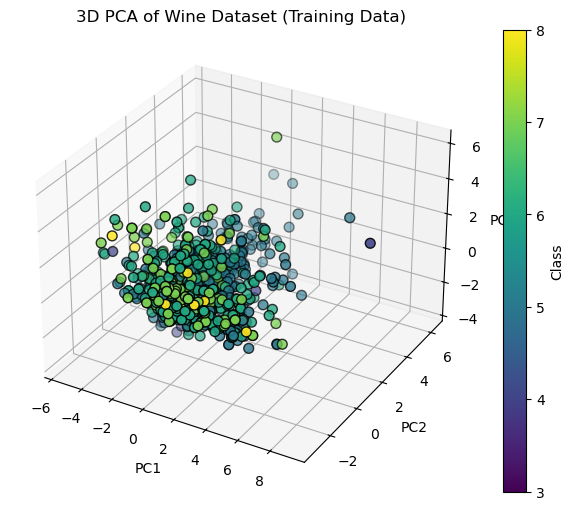

In [51]:
# Plot in 3D using matplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    x_train_pca[:, 0], x_train_pca[:, 1], x_train_pca[:, 2],
    c=y_train, cmap='viridis', edgecolor='k', s=50
)

ax.set_title('3D PCA of Wine Dataset (Training Data)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.colorbar(scatter, label='Class')
plt.show()

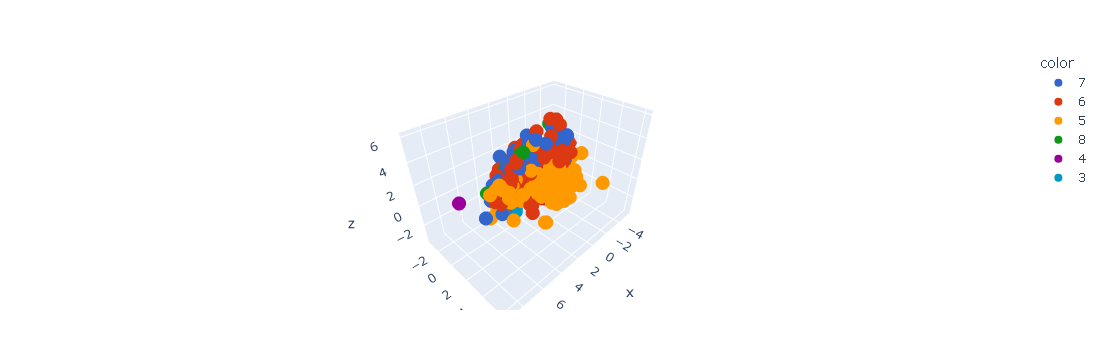

In [122]:
#3d Visualization using plotly
import plotly.express as px
y_train_pca = y_train.astype(str)
fig = px.scatter_3d(df,x=x_train_pca[:,0],
                 y=x_train_pca[:,1],
                 z=x_train_pca[:,2],
                 color=y_train_pca,
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_layout(
    margin=dict(l=50,r=50,t=50,b=50)
)

fig.show()

# How to select the n-compoent in which eigen value is Max

In [76]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# this will show all eigen values of all eigen vectors

In [80]:
pca_Cmp = PCA(n_components=None) # fit n_components = None to get all Eigen Value of All eigen ventors
# fit and transform
x_train_cmp = pca_Cmp.fit_transform(x_train_scaled)
cmp = pca_Cmp.explained_variance_ratio_
np.cumsum(cmp)

array([0.28278769, 0.45508304, 0.60293012, 0.7116257 , 0.79996591,
       0.86024947, 0.91045622, 0.94786726, 0.978706  , 0.99484414,
       1.        ])

### Plot figure to select the n-components(eigen value) in 90 ration
### As we get 6 n-component value for 90% of eigen value 

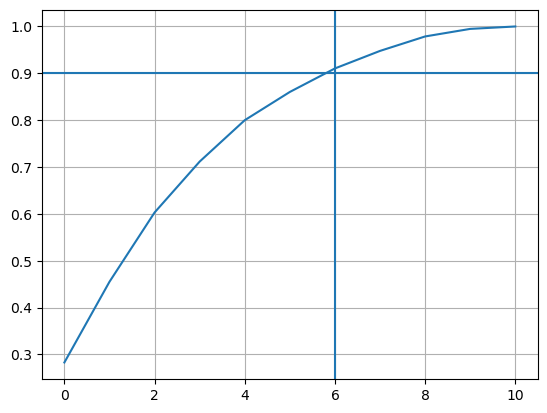

In [110]:
plt.plot(np.cumsum(cmp))
plt.grid()
plt.axhline(0.9)
plt.axvline(6) # hence in 56 n_component value it gives us 90% variance

# now apply n_compound=5.9

In [112]:
# Build pipeline: scaling → PCA → KNN
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=6)),  # place 6 here
    ('knn', KNeighborsClassifier())
])


In [114]:
# Fit pipeline2
pipeline2.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('knn', KNeighborsClassifier())])

In [116]:
# Predict
y_pred = pipeline.predict(x_test)

In [118]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Pipeline with PCA + KNN Accuracy: {acc:.2f}')

Pipeline with PCA + KNN Accuracy: 0.56


### Hence since we get same accuracy rate after apply pca So,PCA is a dimensionality reduction and visualization tool, not an accuracy booster. It’s useful when you want simpler models or to handle very high-dimensional data, but it won’t magically improve a well-performing model.